<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/cnn_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

###**1.** Load Mnist Dataset

1.   List item
2.   List item




*   X_train has (60000, 28, 28)
      1. 60000 -> images
      2. 28 * 28 -> image pixel
*   y_train contains (60000) -> labels of images [0-9]
  

*   X_test contains ( 10000, 28, 28 ) -> images **to evaluate the MODEL performance**
      1. 10000 -> images
      2. 28 * 28 -> image pixel
*   y_test contains ( 60000 ) -> labels of images [0-9] **TRUE labels for the specific images**





In [71]:

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


In [72]:
X_train = X_train / 255
X_test = X_test / 255

In [73]:
X_train.ndim

3

In [100]:
X_train = X_train[..., tf.newaxis]
y_train = y_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
y_test = y_test[..., tf.newaxis]

In [101]:
X_train[0].ndim

4

In [76]:
print(f'training : {X_train.shape}, labels : {y_train.shape}')
print(f'testning : {X_test.shape}, labels : {y_test.shape}')

training : (60000, 28, 28, 1), labels : (60000, 1)
testning : (10000, 28, 28, 1), labels : (10000, 1)


### **2.** Visualize first image from mnist dataset

Text(0.5, 1.0, '[5]')

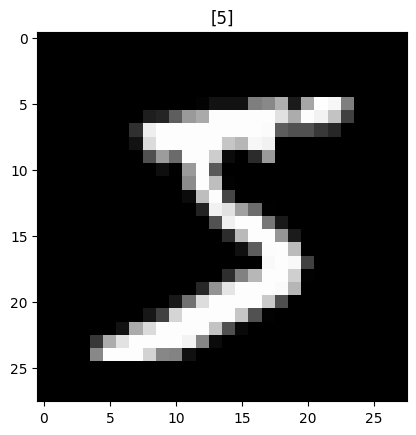

In [77]:
plt.imshow(X_train[0], cmap='grey')
plt.title(y_train[0])


### **3.** Build CNN
1. Conv2D(30, (3,3), 'relu', (28, 28,1))
    1. 30 -> number of filters to detect patterns
    2. (3,3) -> each filter scans 3 * 3 pixels at a time
    3. 'relu' -> introduces non-linearity to Conv2D array
    4. (28, 28, 1) -> image pixels with 1 colorchannel in our case black & grey
2. MaxpoolLayer(2,2)
    * Reduces the image size to speed up training process
3. Conv2D(60, (3,3), 'relu')
    * another Convolutional Layer for deeper feature extraction
4. MaxPoolLayer(2,2)
    * again, reduce image size to improve efficency
5. Flatten Layer
    1. Flatten()
      * Converts 2D feature maps into 1D vector for the next layers
6. Fully Connected Layers
    1. Dense(128, 'relu')
      * 128 -> number of Neurons to learn complex pattern from flattend images
      * 'relu' -> non-linearity
    2. Dense(10, 'softmax')
      * 10 -> number of outputs. in our case [0-9] labels
      * 'softmax' -> used for multi-class classification ( returns probability distribution [0, -1])

In [78]:
model = models.Sequential([
    layers.Conv2D(30, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(60, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Subclass API Example
used simple architecture from sequential architecture

In [79]:
class M1(models.Model):
  # define all the layers to be used
  def __init__(self, output_size, activation):
    super().__init__()
    self.conv1 = layers.Conv2D(30, kernel_size=(3,3), activation=activation, input_shape=(28, 28,1))
    self.maxPool1 = layers.MaxPool2D(2,2)
    self.conv2 = layers.Conv2D(40, kernel_size=(3,3), activation=activation)
    self.maxPool2 = layers.MaxPool2D(2,2)
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(128, activation=activation)
    self.dense2 = layers.Dense(output_size, activation='softmax')

  # Forward pass
  # how the data flows through the model
  def call(self, x):
    print(x.ndim)
    x = self.conv1(x)
    x = self.maxPool1(x)
    x = self.conv2(x)
    x = self.maxPool2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x

m1 = M1(output_size=10, activation='relu')
m1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


m1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
4
4
4
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9065 - loss: 0.30494
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9065 - loss: 0.3047 - val_accuracy: 0.9825 - val_loss: 0.0589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9870 - val_loss: 0.0373
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9898 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9894 - val_loss: 0.0339


In [80]:
X_train[0].ndim

3

In [81]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 26, 26, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 13, 13, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 11, 11, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 5, 5, 60)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,978 (820.23 KB)

 Trainable params: 209,978 (820.23 KB)

 Non-trainable params: 0 (0.00 B)

### **4.** Compile and Train the MODEL
1. Optimizer = 'adam' ->  **Adjusts weights efficiently**
2. loss = 'sparse_categorical_crossentropy' -> **Suitable for Multi-Class Classification**
3. metrics='accuracy' -> **gives accuracy of model during training**

In [82]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9100 - loss: 0.2936 - val_accuracy: 0.9853 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9869 - loss: 0.0449 - val_accuracy: 0.9879 - val_loss: 0.0388
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9918 - val_loss: 0.0255
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9885 - val_loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accuracy: 0.9892 - val_loss: 0.0339


### **5.** Evaluate The Trained Model

In [83]:
train_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Train Loss : {train_loss}')
print(f'Test Loss : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9853 - loss: 0.0434
Train Loss : 0.033879611641168594
Test Loss : 0.9891999959945679


### **6.** Save Model

In [84]:
model.save('my_model.h5')

### **7.** Try Loading Saved Model

In [85]:
my_model = models.load_model('my_model.h5')

In [86]:
X_test.shape

(10000, 28, 28, 1)

In [87]:
my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 26, 26, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 13, 13, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 11, 11, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 5, 5, 60)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,980 (820.24 KB)

 Trainable params: 209,978 (820.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [88]:
def plot_img(index):
  plt.imshow(X_test[index], cmap='grey')
  plt.title(f'True Label : {y_test[index]} \nPredicted Label : {np.argmax(my_model.predict(X_test)[index])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


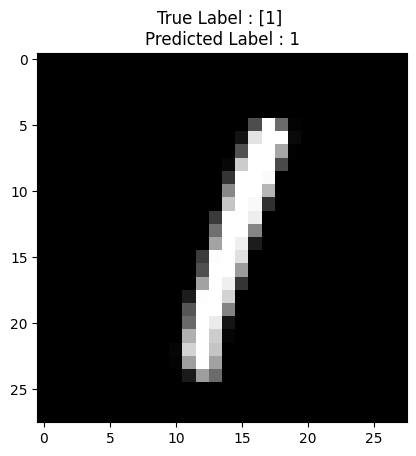

In [89]:
plot_img(5)

### **8.** Predict using my_model

In [90]:
my_model_pred = my_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [91]:
test_loss, test_acc = my_model.evaluate(X_test, y_test)
print(f'test loss: {test_loss} \ntest acc : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9853 - loss: 0.0434
test loss: 0.033879611641168594 
test acc : 0.9891999959945679


In [92]:
my_model_pred[0]

array([1.5712485e-10, 2.6243854e-09, 3.9891454e-08, 9.9205821e-10,
       6.6063550e-09, 4.2012256e-09, 6.0622296e-16, 9.9999994e-01,
       2.3811753e-10, 7.5679091e-10], dtype=float32)

In [93]:
print(f'True Labels : {y_test[5]} \nPredicted label : {np.argmax(my_model_pred[5])}')

True Labels : [1] 
Predicted label : 1


### Confusion matrix

In [94]:
my_model_pred.shape

(10000, 10)

In [95]:
y_test.shape

(10000, 1)

**loop through the predicted value and get the maximum value**

In [96]:
pred_val = [np.argmax(i) for i in my_model_pred]

In [97]:
cf_mat = tf.math.confusion_matrix(labels=y_test, predictions=pred_val)
cf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    2,    0,    0,    2,    0,    1,    1,    0],
       [   0, 1125,    1,    1,    0,    4,    3,    1,    0,    0],
       [   1,    0, 1027,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    2, 1001,    0,    5,    0,    1,    1,    0],
       [   0,    0,    0,    0,  971,    0,    4,    0,    1,    6],
       [   1,    0,    1,    7,    0,  882,    1,    0,    0,    0],
       [   5,    2,    2,    0,    1,    2,  946,    0,    0,    0],
       [   0,    1,    6,    1,    0,    0,    0, 1014,    1,    5],
       [   2,    0,    2,    3,    0,    6,    0,    2,  957,    2],
       [   0,    0,    1,    0,    3,    6,    0,    3,    1,  995]],
      dtype=int32)>

### Visualize Confuision Matrix

In [98]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'True Label')

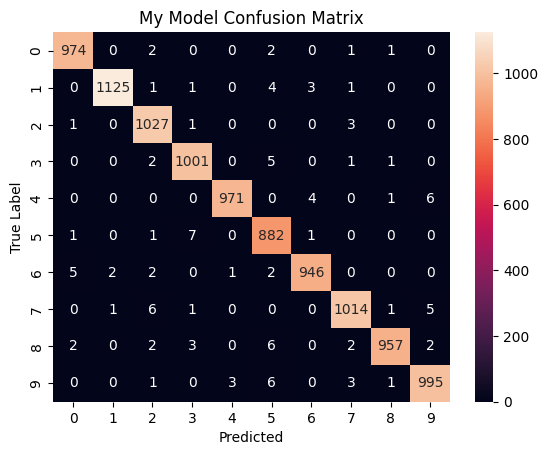

In [99]:
sns.heatmap(cf_mat, annot=True, fmt='d')
plt.title('My Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True Label')